In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
np.set_printoptions(formatter={'float': lambda x: "{0:0.16f}".format(x)})

In [2]:
def one_hot(Y):
    one_hot_y = np.zeros(shape=(y.max()+1, y.size))
    one_hot_y[y, np.arange(y.size)] = 1
    return one_hot_y

# Model

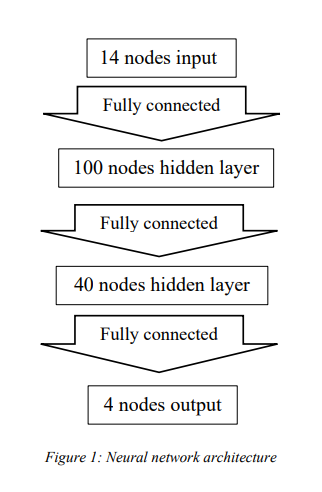

## Initialize parameters Randomly
$ W_1 = np.random.randn(n_1, n_0) $

$ b_1 = np.np.random.randn(n_1, 1)$

$ W_2 = np.random.randn(n_2, n_1) $

$ b_2 = np.np.random.randn(n_2, 1)$

$ W_3 = np.random.randn(n_3, n_2) $

$ b_3 = np.np.random.randn(n_3, 1)$

## *Repeat Below Steps for many times : *


## Forward Propagation 

$ Z_1 = W_1 * X + B_1 $

$ A_1 = ReLU ( Z_1 ) $  

$ Z_2 = W_2 * A_1 + B_2 $

$ A_2 = ReLU ( Z_2 ) $  

$ Z_3 = W3 * A_2 + B_3 $

$ A_3 = Softmax( Z_3 ) $

## Softmax 

$ a_i = \frac{e^{z_i}}{\sum_{i=k}^ne^{z_k}}$


## Cost Function 

$Loss = - \sum_{i=k}^{n}[ y_k*log(a_k) ]$

$Cost = - \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{n}[ y_k*log(a_k) ]$



## Backward Propagation

$dZ_3 = ( A_3 - Y )$

$ dW_3 = \frac{1}{m}. dZ_3 . A_2^T$

$ dB_3 = \frac{1}{m}.sum(dZ_3, 1)$


$dZ_2 = W_3^T . dZ_3 * f_1^|(Z_2)$

$ dW_2 = \frac{1}{m}. dZ_2 . A_1^T$

$ dB_2 = \frac{1}{m}.sum(dZ_2, 1)$


$dZ_1 = W_2^T . dZ_2 * f_1^|(Z_1) $

$dW_1 = \frac{1}{m}.dZ_1.X^T$

$dB_1 = \frac{1}{m}.sum(dZ_1, 1)$


## Updating Parameters


$ W_3 = W_3 -  \alpha * \frac{\partial Cost }{\partial W_3}$ 

$ B_3 = B_3 -  \alpha * \frac{\partial Cost }{\partial B_3}$ 

$ W_2 = W_2 -  \alpha * \frac{\partial Cost }{\partial W_2}$ 

$ B_2 = B_2 -  \alpha * \frac{\partial Cost }{\partial B_2}$ 

$ W_1 = W_1 -  \alpha * \frac{\partial Cost }{\partial W_1}$ 

$ B_1 = B_1 -  \alpha * \frac{\partial Cost }{\partial B_1}$ 


# ANN Model

In [3]:
class ANN:
    def __init__(self):
        self.w1 = np.random.rand(100, 14) - 0.5
        self.b1 = np.random.rand(100, 1) - 0.5
        self.w2 = np.random.rand(40, 100) - 0.5
        self.b2 = np.random.rand(40, 1) - 0.5
        self.w3 = np.random.rand(4, 40) - 0.5
        self.b3 = np.random.rand(4, 1) - 0.5
        self.store = Store()
        
    def relu(self, x):
        return np.maximum(0, x)

    def softmax(self, x):
        expX = np.exp(x - np.max(x))
        return expX / expX.sum(axis=0, keepdims=True)
    
    def derivative_relu(self, x):
        return x > 0
    
    def cross_entropy(self, y_pred,y):
        return -np.mean(y * np.log(y_pred + 1e-20))
    
    # to get a3
    def get_predict(self):
        z3 = self.w3.dot(self.a2) + self.b3
        a3 = self.softmax(self.z3)
        return a3
    
    def get_cost(self, predictions):
        return self.cross_entropy(predictions,self.y)
    
    # to get a3
    def get_val_predict(self,val_x):
        z1 = self.w1.dot(val_x) + self.b1
        a1 = self.relu(z1)
        z2 = self.w2.dot(a1) + self.b2
        a2 = self.relu(z2)
        z3 = self.w3.dot(a2) + self.b3
        a3 = self.softmax(z3) 
        return a3
    
    def forward_propagation(self):
        
        self.z1 = self.w1.dot(self.x) + self.b1
        self.a1 = self.relu(self.z1)

        self.z2 = self.w2.dot(self.a1) + self.b2
        self.a2 = self.relu(self.z2)

        self.z3 = self.w3.dot(self.a2) + self.b3
        self.a3 = self.softmax(self.z3)
        
    def back_propagation(self):
        m = self.y.shape[1]

        dz3 = self.a3 - self.y
        dw3 = (1/m) * (dz3.dot(self.a2.T))
        db3 = (1/m) * np.sum(dz3, axis=1,keepdims=True) 
       
        dz2 = self.w3.T.dot(dz3)*self.derivative_relu(self.z2)
        dw2 = (1/m) * (dz2.dot(self.a1.T))
        db2 = (1/m) * np.sum(dz2, axis=1,keepdims=True)

        dz1 = self.w2.T.dot(dz2)*self.derivative_relu(self.z1)
        dw1 = (1/m) * (dz1.dot(self.x.T))
        db1 = (1/m) * np.sum(dz1, axis=1,keepdims=True)

        return db1, db2, db3, dw1, dw2, dw3
                       
    def gradient_decent(self):
        #updating parameters
        for i in range(self.epochs):

            self.forward_propagation()

            db1, db2, db3, dw1, dw2, dw3 = self.back_propagation()

            self.w1 = self.w1 - self.alpha*dw1
            self.w2 = self.w2 - self.alpha*dw2
            self.w3 = self.w3 - self.alpha*dw3

            self.b1 = self.b1 - self.alpha*np.reshape(db1, (self.b1.shape[0], 1))
            self.b2 = self.b2 - self.alpha*np.reshape(db2, (self.b2.shape[0], 1))
            self.b3 = self.b3 - self.alpha*np.reshape(db3, (self.b3.shape[0], 1))

            predict = self.get_predict()
            cost = self.get_cost(predictions=predict)
            y_hat = np.argmax(predict, axis=0)
            Y = np.argmax(self.y.T,axis=1)
            acc = (y_hat==Y).mean()*100

            self.store.add_cost(cost)
            self.store.add_acc(acc)

            self.store.set_dw(dw1,dw2,dw3)
            self.store.set_db(db1,db2,db3)
            
            if len(self.val_x) >0 :         
                val_pred = self.get_val_predict(self.val_x)
                test_cost = self.cross_entropy(val_pred,self.val_y)
              
                y_hat_val = np.argmax(val_pred,axis=0)
                Y_val = np.argmax(self.val_y.T,axis=1)
                test_acc = (y_hat_val==Y_val).mean()*100

                self.store.add_test_cost(test_cost)
                self.store.val_add_acc(test_acc)

            print("Epoch :{} >>> Cost :{} Accuracy:{}".format(i+1,cost,acc))

    def fit(self, X, Y, alpha=0.01, epochs=10,val=([],[])):
        self.x = X
        self.y = Y

        self.val_x=val[0]
        self.val_y=val[1]

        self.alpha = alpha
        self.epochs = epochs

        self.gradient_decent()

        return self.store

# ANN Memory

In [4]:
class Store:
    def __init__(self):
        self.cost = []
        self.test_cost = []
        self.acc=[]
        self.test_acc=[]

        self.dw1=None
        self.dw2=None
        self.dw3=None

        self.db1=None
        self.db2=None
        self.db3=None
        
    def set_dw(self,dw1,dw2,dw3):
        self.dw1=dw1
        self.dw2=dw2
        self.dw3=dw3
        
    def set_db(self,db1,db2,db3):
        self.db1=db1
        self.db2=db2
        self.db3=db3
        
    def add_cost(self,value):
        self.cost.append(value)

    def add_test_cost(self,val_score):
        self.test_cost.append(val_score)

    def add_acc(self,acc):
        self.acc.append(acc)
    
    def val_add_acc(self,acc):
        self.test_acc.append(acc)

    def cost_vs_iterations_type(self, plot_type):
        plt.title('Cost vs Iterations')
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        if plot_type=='training':
            plt.plot(self.cost,label='train')
        elif plot_type=='testing':
            if self.test_cost :
                plt.plot(self.test_cost,label='test')
        plt.legend()
        plt.show()
        
    def cost_vs_iterations(self):
        plt.title('Cost vs Iterations')
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.plot(self.cost,label='train')
        if self.test_cost :
            plt.plot(self.test_cost,label='test')
        plt.legend()
        plt.show()
        
    def acc_vs_iterations(self):
        # print(self.test_acc)
        plt.title('Accuracy vs Iterations')
        plt.xlabel('iterations')
        plt.ylabel('accuracy')
        plt.plot(self.acc,label='train')
        if self.test_acc :
            plt.plot(self.test_acc,label='test')
        plt.legend()
        plt.show()
        
    def acc_vs_iterations_type(self, plot_type):
        # print(self.test_acc)
        plt.title('Accuracy vs Iterations')
        plt.xlabel('iterations')
        plt.ylabel('accuracy')
        if plot_type=='training':
            plt.plot(self.acc,label='train')
        elif plot_type=='testing':
            if self.test_acc :
                plt.plot(self.test_acc,label='test')
        plt.legend()
        plt.show()

# Check Implementation

In [5]:
X = np.array([-1, 1, 1, 1, -1, -1, 1, -1, 1,
              1, -1, -1, 1, 1], dtype=np.float32)
y = np.array([3])
print(y)
print(y.shape)
y_train = one_hot(y)
x = np.array([X])

[3]
(1,)


In [6]:
#y_train

In [7]:
df_w_1 = pd.read_csv('w.csv', header=None)
df_b_1 = pd.read_csv('b.csv', header=None)

In [8]:
#w_initial.head()

In [9]:
#w_initial.tail()

In [10]:
#b_initial.head()

In [11]:
df_w_1.drop(0, axis=1, inplace=True)
df_b_1.drop(0, axis=1, inplace=True)

In [12]:
W1 =  df_w_1.iloc[:14].dropna(axis=1).to_numpy().T
B1 = df_b_1.iloc[0].dropna().to_numpy().reshape(100, 1)
W2 =  df_w_1.iloc[14:114].dropna(axis=1).to_numpy().T
B2 = df_b_1.iloc[1].dropna().to_numpy().reshape(40, 1)
W3 =  df_w_1.iloc[114:154].dropna(axis=1).to_numpy().T
B3 = df_b_1.iloc[2].dropna().to_numpy().reshape(4, 1)

In [13]:
W1.shape ,W2.shape,W3.shape,B1.shape,B2.shape,B3.shape

((100, 14), (40, 100), (4, 40), (100, 1), (40, 1), (4, 1))

In [14]:
model = ANN()

model.w1 = W1
model.w2 = W2
model.w3 = W3

model.b1 = B1
model.b2 = B2
model.b3 = B3

x_train = x.T
store=model.fit(X=x_train,Y=y_train,alpha=0.01,epochs=2)

Epoch :1 >>> Cost :11.512925464970229 Accuracy:0.0
Epoch :2 >>> Cost :-0.0 Accuracy:100.0


In [15]:
#x

In [16]:
#store.dw1

In [17]:
#store.dw2

In [18]:
#store.dw3

In [19]:
#store.db1

In [20]:
#store.db2

In [21]:
#store.db3

# PART1

In [22]:
X = np.array([-1, 1, 1, 1, -1, -1, 1, -1, 1,
              1, -1, -1, 1, 1], dtype=np.float32)
y = np.array([3])
print(y)
print(y.shape)
y_train = one_hot(y)
x = np.array([X])

[3]
(1,)


In [23]:
df_w = pd.read_csv('w-100-40-4.csv', header=None)
df_b = pd.read_csv('b-100-40-4.csv', header=None)

df_w.drop(0, axis=1, inplace=True)
df_b.drop(0, axis=1, inplace=True)

In [24]:
model_part1 = ANN()

W1 =  df_w.iloc[:14].dropna(axis=1).to_numpy().T
B1 = df_b.iloc[0].dropna().to_numpy().reshape(100, 1)
W2 =  df_w.iloc[14:114].dropna(axis=1).to_numpy().T
B2 = df_b.iloc[1].dropna().to_numpy().reshape(40, 1)
W3 =  df_w.iloc[114:154].dropna(axis=1).to_numpy().T
B3 = df_b.iloc[2].dropna().to_numpy().reshape(4, 1)

model_part1.w1 = W1
model_part1.w2 = W2
model_part1.w3 = W3

model_part1.b1 = B1
model_part1.b2 = B2
model_part1.b3 = B3

In [25]:
W1.shape ,W2.shape,W3.shape,B1.shape,B2.shape,B3.shape

((100, 14), (40, 100), (4, 40), (100, 1), (40, 1), (4, 1))

In [26]:
x

array([[-1.0000000000000000, 1.0000000000000000, 1.0000000000000000,
        1.0000000000000000, -1.0000000000000000, -1.0000000000000000,
        1.0000000000000000, -1.0000000000000000, 1.0000000000000000,
        1.0000000000000000, -1.0000000000000000, -1.0000000000000000,
        1.0000000000000000, 1.0000000000000000]], dtype=float32)

In [27]:
x_train= x.T
store = model_part1.fit(
    X=x_train,
    Y=y_train,
    alpha=0.01,
    epochs=1
)

Epoch :1 >>> Cost :5.551115123125784e-17 Accuracy:100.0


## resuls

In [28]:
df_dw1 = pd.DataFrame(store.dw1.T)
df_dw1.shape

(14, 100)

In [29]:
df_dw1 = pd.DataFrame(store.dw1.T)
df_dw2 = pd.DataFrame(store.dw2.T)
df_dw3 = pd.DataFrame(store.dw3.T)

In [30]:
df_all_dw = pd.concat([df_dw1,df_dw2,df_dw3], ignore_index=True)

In [31]:
df_all_dw.to_csv('task_1_dw.csv',header=False,index=False)

In [32]:
df_db1 = pd.DataFrame(store.db1.T)
df_db2 = pd.DataFrame(store.db2.T)
df_db3 = pd.DataFrame(store.db3.T)

In [33]:
df_all_db = pd.concat([df_db1,df_db2,df_db3], ignore_index=True)

In [34]:
df_all_db.to_csv('task_1_db.csv',header=False,index=False)

# PART2

In [35]:
X_train = pd.read_csv('x_train.csv', header=None)
Y_train = pd.read_csv('y_train.csv', header=None)

X_val = pd.read_csv('x_test.csv', header=None)
Y_val = pd.read_csv('y_test.csv', header=None)

In [36]:
X_train.shape, Y_train.shape, X_val.shape,Y_val.shape

((13107, 14), (13107, 1), (3277, 14), (3277, 1))

In [37]:
x_train_data = X_train.to_numpy().T
y_train_data = Y_train.to_numpy()

In [42]:
hot = OneHotEncoder()

In [43]:
y_train_data = hot.fit_transform(y_train_data).toarray().T
x_train_data.shape,y_train_data.shape

((14, 13107), (4, 13107))

In [44]:
x_val_data = X_val.to_numpy().T
y_val_data = hot.transform(Y_val).toarray().T

In [45]:
x_val_data.shape,y_val_data.shape

((14, 3277), (4, 3277))

In [71]:
#x_val_data

In [72]:
#y_val_data

### learning rate = 1

In [ ]:
model_part2 = ANN()

store = model_part2.fit(X=x_train_data,Y=y_train_data, alpha=1,epochs=1000,val=(x_val_data,y_val_data))

Epoch :1 >>> Cost :0.7100552118404995 Accuracy:25.131609063859006
Epoch :2 >>> Cost :2.6547575226822326 Accuracy:28.534370946822307
Epoch :3 >>> Cost :0.5289782102115359 Accuracy:21.469443808651864
Epoch :4 >>> Cost :0.35689718559074673 Accuracy:28.68696116578927
Epoch :5 >>> Cost :0.34899486628331494 Accuracy:28.740367742427708
Epoch :6 >>> Cost :0.3453838646595991 Accuracy:28.97688258182651
Epoch :7 >>> Cost :0.343315738868819 Accuracy:29.709315632867934
Epoch :8 >>> Cost :0.3419002822552294 Accuracy:30.128938735027084
Epoch :9 >>> Cost :0.34071199982914113 Accuracy:31.265735866330967
Epoch :10 >>> Cost :0.339590718109094 Accuracy:31.815060654612036
Epoch :11 >>> Cost :0.3384399264418985 Accuracy:32.15075913633936
Epoch :12 >>> Cost :0.3371995950869242 Accuracy:32.87556267643244
Epoch :13 >>> Cost :0.3358119571962923 Accuracy:33.54695963988708
Epoch :14 >>> Cost :0.3342212436783223 Accuracy:34.24887464713512
Epoch :15 >>> Cost :0.33235506637827983 Accuracy:34.88212405584802
Epoch :16

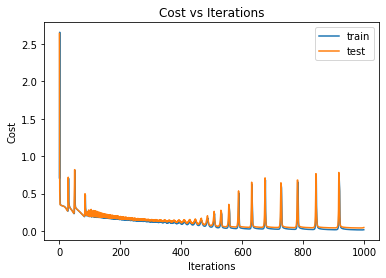

In [ ]:
store.cost_vs_iterations()

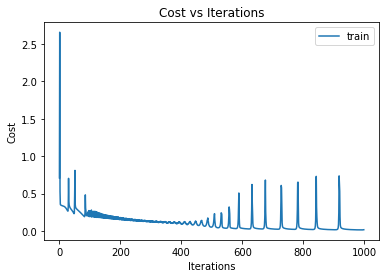

In [ ]:
store.cost_vs_iterations_type(plot_type='training')

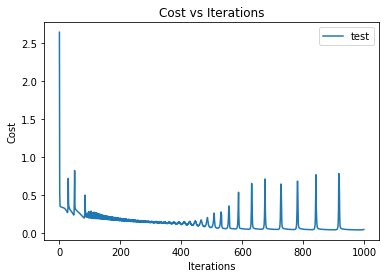

In [ ]:
store.cost_vs_iterations_type(plot_type='testing')

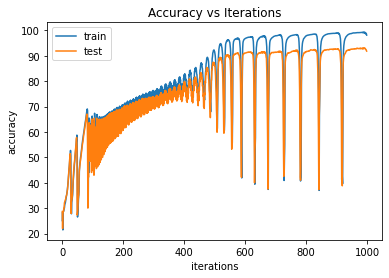

In [ ]:
store.acc_vs_iterations()

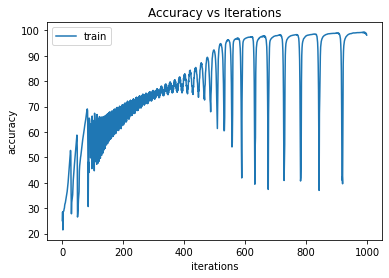

In [ ]:
store.acc_vs_iterations_type(plot_type='training')

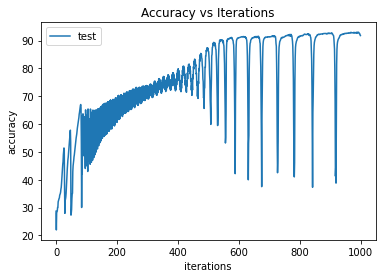

In [ ]:
store.acc_vs_iterations_type(plot_type='testing')

### learning rate = 0.1

In [70]:
model_part2 = ANN()
store = model_part2.fit(X=x_train_data,Y=y_train_data,alpha=0.1,epochs=1000,val=(x_val_data,y_val_data))

Epoch :1 >>> Cost :0.9325213319484457 Accuracy:26.626993209735257
Epoch :2 >>> Cost :0.6464723274938687 Accuracy:24.50598916609445
Epoch :3 >>> Cost :0.5516938210281677 Accuracy:27.008468757152666
Epoch :4 >>> Cost :0.5123670964345269 Accuracy:27.42809185931182
Epoch :5 >>> Cost :0.4828943915907212 Accuracy:27.672236209658962
Epoch :6 >>> Cost :0.4600972101928247 Accuracy:27.77141985198749
Epoch :7 >>> Cost :0.4422238280687295 Accuracy:28.259708552681772
Epoch :8 >>> Cost :0.42792033385661576 Accuracy:28.656443121995878
Epoch :9 >>> Cost :0.41625087893658447 Accuracy:29.121843289845124
Epoch :10 >>> Cost :0.4065772714590242 Accuracy:29.655909056229497
Epoch :11 >>> Cost :0.39839856090686043 Accuracy:30.14419775692378
Epoch :12 >>> Cost :0.39135125198239507 Accuracy:30.66300450141146
Epoch :13 >>> Cost :0.3851880582197162 Accuracy:31.20469977874418
Epoch :14 >>> Cost :0.37973798538470077 Accuracy:31.540398260471502
Epoch :15 >>> Cost :0.37484655124739846 Accuracy:31.89135576409552
Epoch

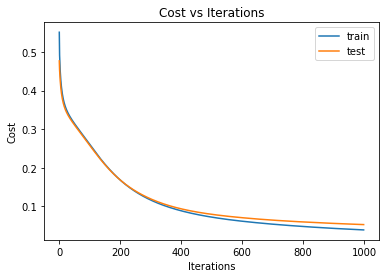

In [57]:
store.cost_vs_iterations()

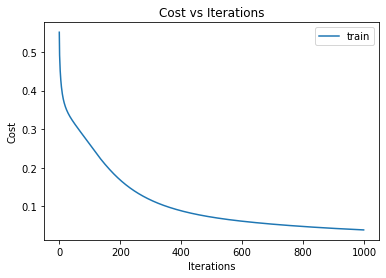

In [58]:
store.cost_vs_iterations_type(plot_type='training')

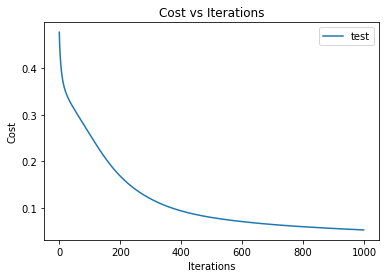

In [59]:
store.cost_vs_iterations_type(plot_type='testing')

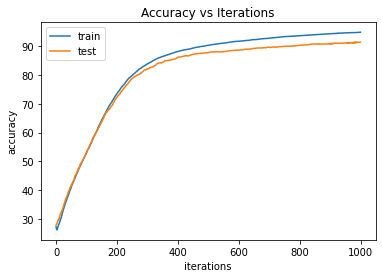

In [60]:
store.acc_vs_iterations()

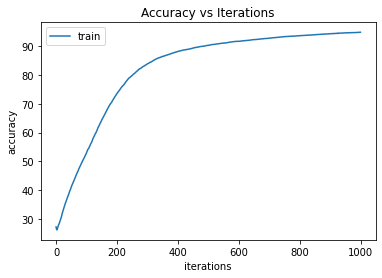

In [61]:
store.acc_vs_iterations_type(plot_type='training')

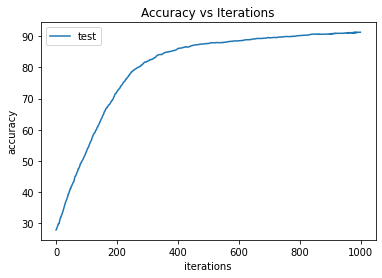

In [62]:
store.acc_vs_iterations_type(plot_type='testing')

### learning rate = 0.01

In [63]:
model_part2 = ANN()
store = model_part2.fit(
    X=x_train_data,
    Y=y_train_data,
    alpha=0.01,
    epochs=1000,
    val=(x_val_data,y_val_data)
)

Epoch :1 >>> Cost :0.8241182331290973 Accuracy:25.98611429007401
Epoch :2 >>> Cost :0.7782546375598993 Accuracy:25.970855268177313
Epoch :3 >>> Cost :0.738204909959776 Accuracy:25.780117494468602
Epoch :4 >>> Cost :0.7031090017767206 Accuracy:25.848783093003743
Epoch :5 >>> Cost :0.6723073202486152 Accuracy:25.757228961623557
Epoch :6 >>> Cost :0.6452872702169468 Accuracy:25.719081406881816
Epoch :7 >>> Cost :0.6216479766858972 Accuracy:25.734340428778513
Epoch :8 >>> Cost :0.6010343091213943 Accuracy:25.85641260395209
Epoch :9 >>> Cost :0.5831349352121685 Accuracy:26.11581597619593
Epoch :10 >>> Cost :0.5676656036324621 Accuracy:25.98611429007401
Epoch :11 >>> Cost :0.554362582947073 Accuracy:26.016632333867403
Epoch :12 >>> Cost :0.5429615016964936 Accuracy:26.11581597619593
Epoch :13 >>> Cost :0.5332062266610971 Accuracy:26.2378881513695
Epoch :14 >>> Cost :0.5248570716932158 Accuracy:26.19974059662776
Epoch :15 >>> Cost :0.5176971295770855 Accuracy:26.207370107576107
Epoch :16 >>> 

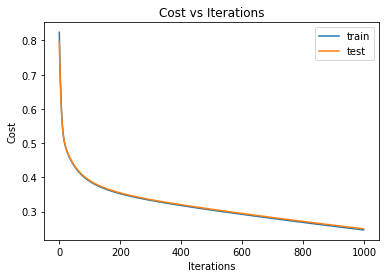

In [64]:
store.cost_vs_iterations()

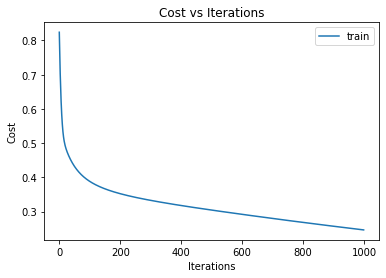

In [65]:
store.cost_vs_iterations_type(plot_type='training')

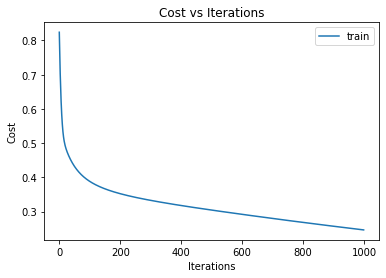

In [66]:
store.cost_vs_iterations_type(plot_type='training')

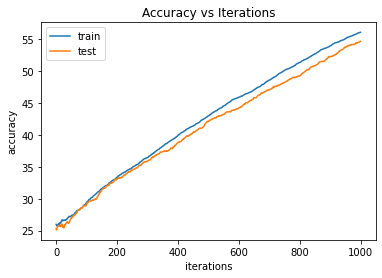

In [67]:
store.acc_vs_iterations()

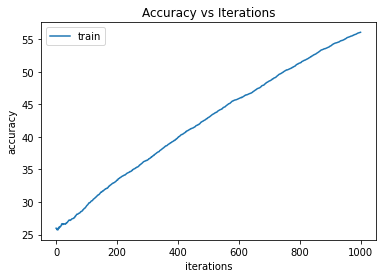

In [68]:
store.acc_vs_iterations_type(plot_type='training')

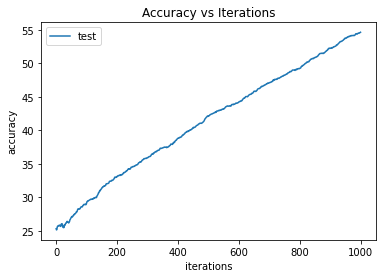

In [69]:
store.acc_vs_iterations_type(plot_type='testing')